In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

In [54]:
files =[file for file in os.listdir(r"C:\Users\karri\Downloads\archive")]
for file in files:
    print(file)

all_data.csv
supermarket_sales - Sheet1.csv


In [55]:
path = r"C:\Users\karri\Downloads\archive"
files = os.listdir(path)

all_data = pd.DataFrame()

for file in files:
    if file.endswith(".csv"):
        current_df = pd.read_csv(os.path.join(path, file))
        all_data = pd.concat([all_data, current_df])

print(all_data.shape)

(4000, 17)


In [56]:
all_data.to_csv(r'C:\Users\karri\Downloads\archive\all_data.csv', index=False)


In [57]:
all_data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [58]:
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [59]:
all_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [60]:
all_data = all_data.dropna(how='all')
all_data.shape

(4000, 17)

In [61]:
'male'.split('/')[0]

'male'

In [62]:
def month(x):
    return x.split('/')[0]

In [63]:
import pandas as pd

# Assuming you have a DataFrame called all_data that contains supermarket sales data
# Replace the data below with your own supermarket sales data
data = {
    'Invoice ID': ['INV001', 'INV002', 'INV003'],
    'Branch': ['A', 'B', 'C'],
    'City': ['City A', 'City B', 'City C'],
    'Customer type': ['Regular', 'VIP', 'Regular'],
    'Gender': ['Male', 'Female', 'Male'],
    'Product line': ['Electronics', 'Clothing', 'Home and Garden'],
    'Unit price': [100, 50, 80],
    'Quantity': [2, 3, 1],
    'Tax 5%': [10, 7.5, 4],
    'Total': [110, 57.5, 84],
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'Time': ['08:30:00', '13:15:00', '18:45:00'],
    'Payment': ['Card', 'Cash', 'Card'],
    'cogs': [100, 50, 80],
    'gross margin percentage': [0.05, 0.1, 0.08],
    'gross income': [10, 7.5, 4],
    'Rating': [4, 5, 3]
}

all_data = pd.DataFrame(data)

# Convert the "Date" column to datetime format
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Extract month information and assign it to the new "Month" column
all_data['Month'] = all_data['Date'].dt.month

# Print the updated DataFrame
print(all_data)


  Invoice ID Branch    City Customer type  Gender     Product line  \
0     INV001      A  City A       Regular    Male      Electronics   
1     INV002      B  City B           VIP  Female         Clothing   
2     INV003      C  City C       Regular    Male  Home and Garden   

   Unit price  Quantity  Tax 5%  Total       Date      Time Payment  cogs  \
0         100         2    10.0  110.0 2023-01-01  08:30:00    Card   100   
1          50         3     7.5   57.5 2023-01-02  13:15:00    Cash    50   
2          80         1     4.0   84.0 2023-01-03  18:45:00    Card    80   

   gross margin percentage  gross income  Rating  Month  
0                     0.05          10.0       4      1  
1                     0.10           7.5       5      1  
2                     0.08           4.0       3      1  


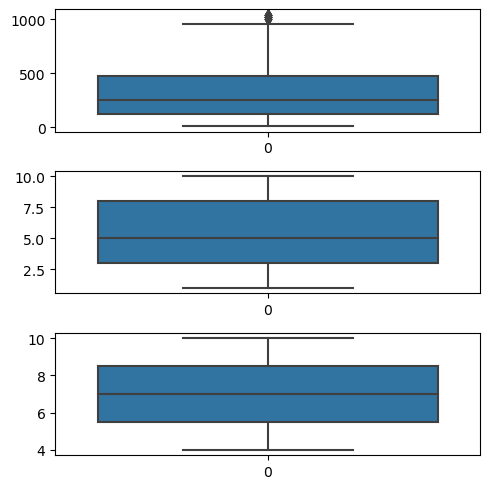

In [64]:


# Read the CSV file and assign it to the df variable
df = pd.read_csv(r'C:/Users/karri/Downloads/archive/all_data.csv')



# Create the figure with subplots and boxplots
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(df['Total'], ax=axs[0])
plt2 = sns.boxplot(df['Quantity'], ax=axs[1])
plt3 = sns.boxplot(df['Rating'], ax=axs[2])
plt.tight_layout()
plt.show()


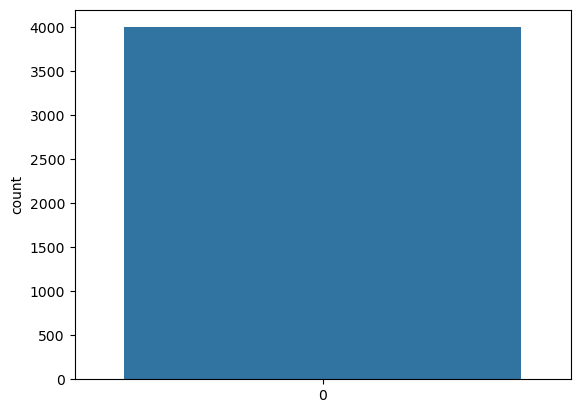

In [65]:

sns.countplot(df['gross margin percentage'])
plt.show()


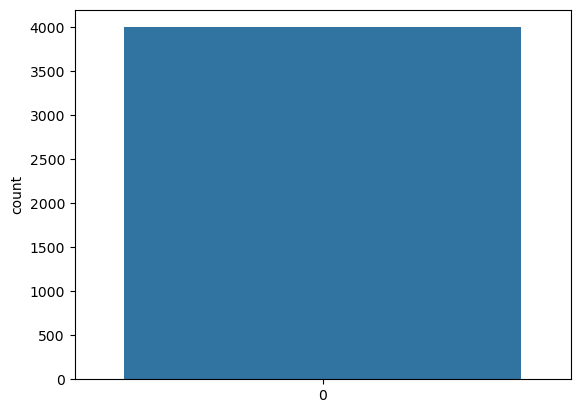

In [66]:

sns.countplot(df['Unit price'])
plt.show()

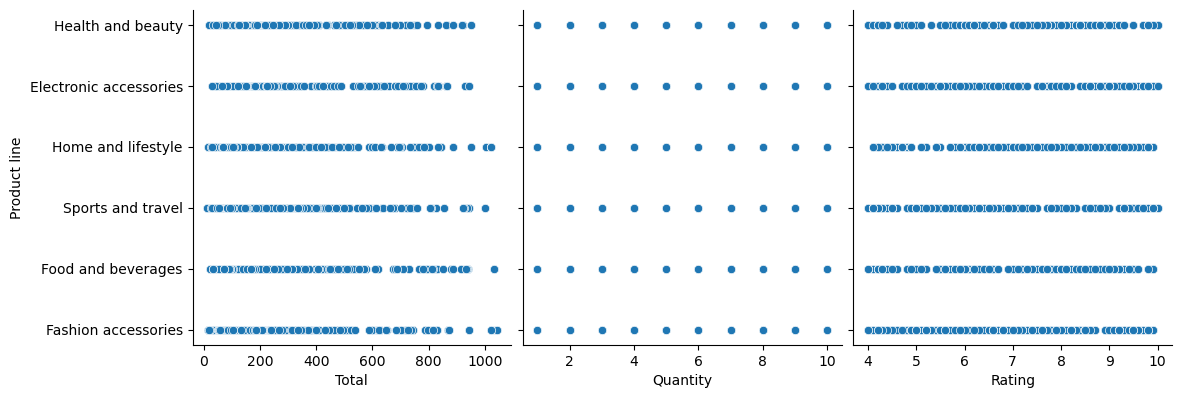

In [67]:
sns.pairplot(df, x_vars=['Total', 'Quantity', 'Rating'], y_vars='Product line', height=4, aspect=1, kind='scatter')
plt.show()


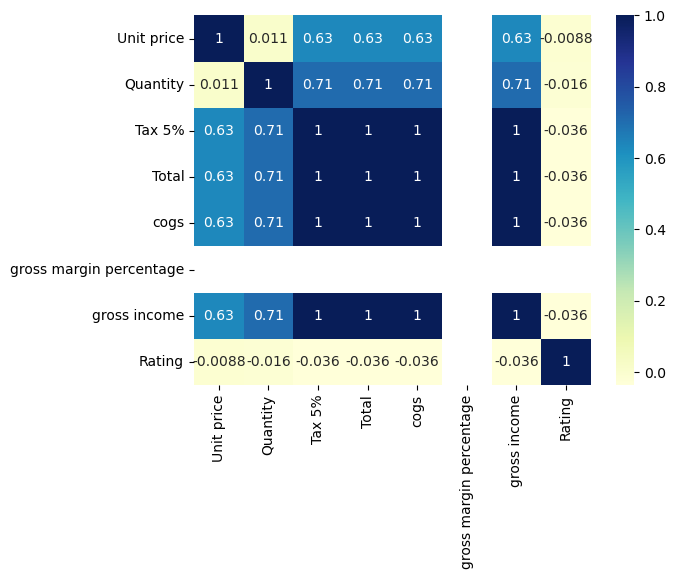

In [68]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()


In [69]:
X = df['Unit price']
y = df['Total']



In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [72]:
X_train.head()


2471    40.05
2190    77.04
1146    30.14
3355    89.14
3926    88.31
Name: Unit price, dtype: float64

In [73]:
y_train.head()


2471    168.2100
2190    242.6760
1146    316.4700
3355    374.3880
3926     92.7255
Name: Total, dtype: float64

In [74]:
import statsmodels.api as sm


In [75]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [76]:
print(lr.params)
print('summary:')
print(lr.summary())

const        -2.641505
Unit price    5.869001
dtype: float64
summary:
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     1867.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          7.19e-313
Time:                        14:36:41   Log-Likelihood:                -18667.
No. Observations:                2800   AIC:                         3.734e+04
Df Residuals:                    2798   BIC:                         3.735e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [77]:
C = 10.2
M = 0.08

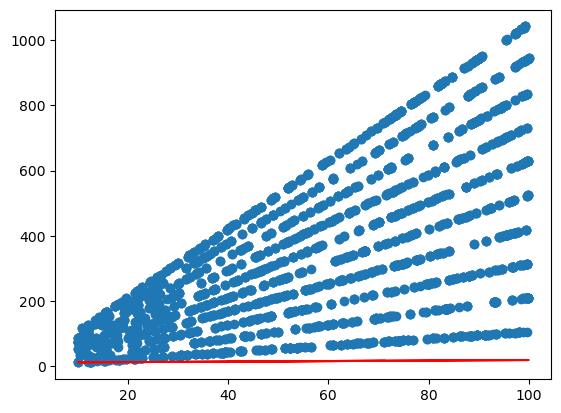

In [78]:
plt.scatter(X_train, y_train)
plt.plot(X_train, C + M*X_train, 'r')
plt.show()

In [79]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [80]:
y_pred.head()


3218    554.150633
883     199.369515
367     384.360430
2226    404.491104
2578    374.559198
dtype: float64

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)


189.88888415607832


In [83]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.40471920537598005

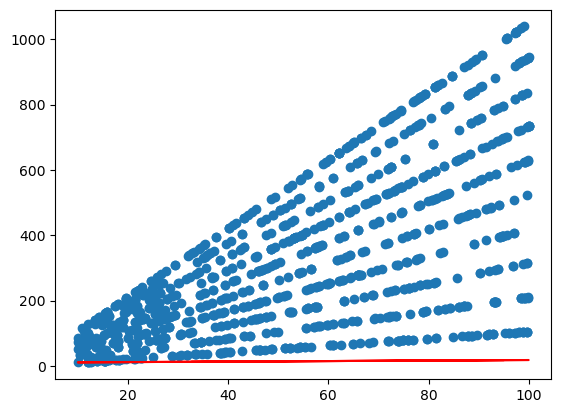

Hence,Increase in sales is predicted


In [84]:
plt.scatter(X_test, y_test)
plt.plot(X_test, C + M * X_test, 'r')
plt.show()
print('Hence,Increase in sales is predicted')